In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/laptop_price_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [ ]:
#checking columns
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [ ]:
#converting all column names into lower case to avoid confusion
df.columns= df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'company', 'typename', 'ram', 'weight', 'price',
       'touchscreen', 'ips', 'cpu brand', 'hdd', 'ssd', 'gpu brand', 'os'],
      dtype='object')

In [ ]:
df.info()
#investigating database checking null values and data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unnamed: 0   1302 non-null   int64  
 1   company      1302 non-null   object 
 2   typename     1302 non-null   object 
 3   ram          1302 non-null   int64  
 4   weight       1302 non-null   float64
 5   price        1302 non-null   float64
 6   touchscreen  1302 non-null   int64  
 7   ips          1302 non-null   int64  
 8   cpu brand    1302 non-null   object 
 9   hdd          1302 non-null   int64  
 10  ssd          1302 non-null   int64  
 11  gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 132.4+ KB


In [ ]:
for i in df.columns:
    if df[i].nunique() < 10:
        print(f'The column "{i}" is __{df[i].dtype}__ \nhas __{df[i].nunique()}__ unique values: \n{df[i].value_counts()}')
        print(10*'==')
    else:
        print(f'The column "{i}" is __{df[i].dtype}__ \nhas __{df[i].nunique()}__ unique values')
        print(10*'==')

The column "unnamed: 0" is __int64__ 
has __1302__ unique values
The column "company" is __object__ 
has __19__ unique values
The column "typename" is __object__ 
has __6__ unique values: 
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: typename, dtype: int64
The column "ram" is __int64__ 
has __9__ unique values: 
8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: ram, dtype: int64
The column "weight" is __float64__ 
has __171__ unique values
The column "price" is __float64__ 
has __791__ unique values
The column "touchscreen" is __int64__ 
has __2__ unique values: 
0    1111
1     191
Name: touchscreen, dtype: int64
The column "ips" is __int64__ 
has __2__ unique values: 
0    938
1    364
Name: ips, dtype: int64
The column "cpu brand" is __object__ 
has __5__ unique values: 
Intel Core i7            527
Intel Core i5          

In [ ]:
for i in df.columns:
    print(f'the columns "{i}" \nhas "{df[i].nunique()}" unique values ')
    print(30*'_')
#checking how many unique values each columns have using a for loop

the columns "unnamed: 0" 
has "1302" unique values 
______________________________
the columns "company" 
has "19" unique values 
______________________________
the columns "typename" 
has "6" unique values 
______________________________
the columns "ram" 
has "9" unique values 
______________________________
the columns "weight" 
has "171" unique values 
______________________________
the columns "price" 
has "791" unique values 
______________________________
the columns "touchscreen" 
has "2" unique values 
______________________________
the columns "ips" 
has "2" unique values 
______________________________
the columns "cpu brand" 
has "5" unique values 
______________________________
the columns "hdd" 
has "6" unique values 
______________________________
the columns "ssd" 
has "13" unique values 
______________________________
the columns "gpu brand" 
has "3" unique values 
______________________________
the columns "os" 
has "3" unique values 
______________________________


In [ ]:
df.shape
#checking rows and columns

(1302, 13)

In [ ]:
df1= df.copy()

In [ ]:
#because unnamed: 0 has 1302 unique values will not be usefull in our ml model so we are droping it for now
df.drop('unnamed: 0', axis= 1, inplace = True)

In [ ]:
df.nunique()
#again checking unique values

company         19
typename         6
ram              9
weight         171
price          791
touchscreen      2
ips              2
cpu brand        5
hdd              6
ssd             13
gpu brand        3
os               3
dtype: int64

In [ ]:
#checking duplicates
df.duplicated().sum()

30

In [ ]:
df.drop_duplicates(inplace= True)
# there are 30 duplicate values we are droping them

In [ ]:
df.duplicated().sum()

0

**EDA** ***`Exploratory Data Analysis`***

*count of top 7 companies*

In [ ]:
a= df['company'].value_counts().sort_values(ascending= False)[:7]
a

Dell       291
Lenovo     289
HP         268
Asus       151
Acer       101
MSI         54
Toshiba     47
Name: company, dtype: int64

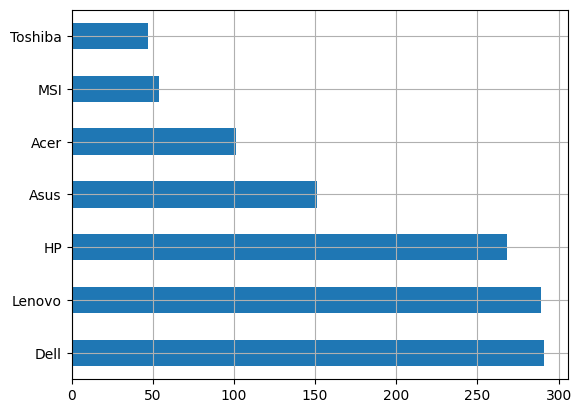

In [ ]:
a.plot(kind= 'barh')
plt.grid()

In [ ]:
df.columns

Index(['company', 'typename', 'ram', 'weight', 'price', 'touchscreen', 'ips',
       'cpu brand', 'hdd', 'ssd', 'gpu brand', 'os'],
      dtype='object')

In [ ]:
df_c= df[['company', 'typename', 'ram', 'touchscreen', 'ips',
       'cpu brand', 'hdd', 'ssd', 'gpu brand']]

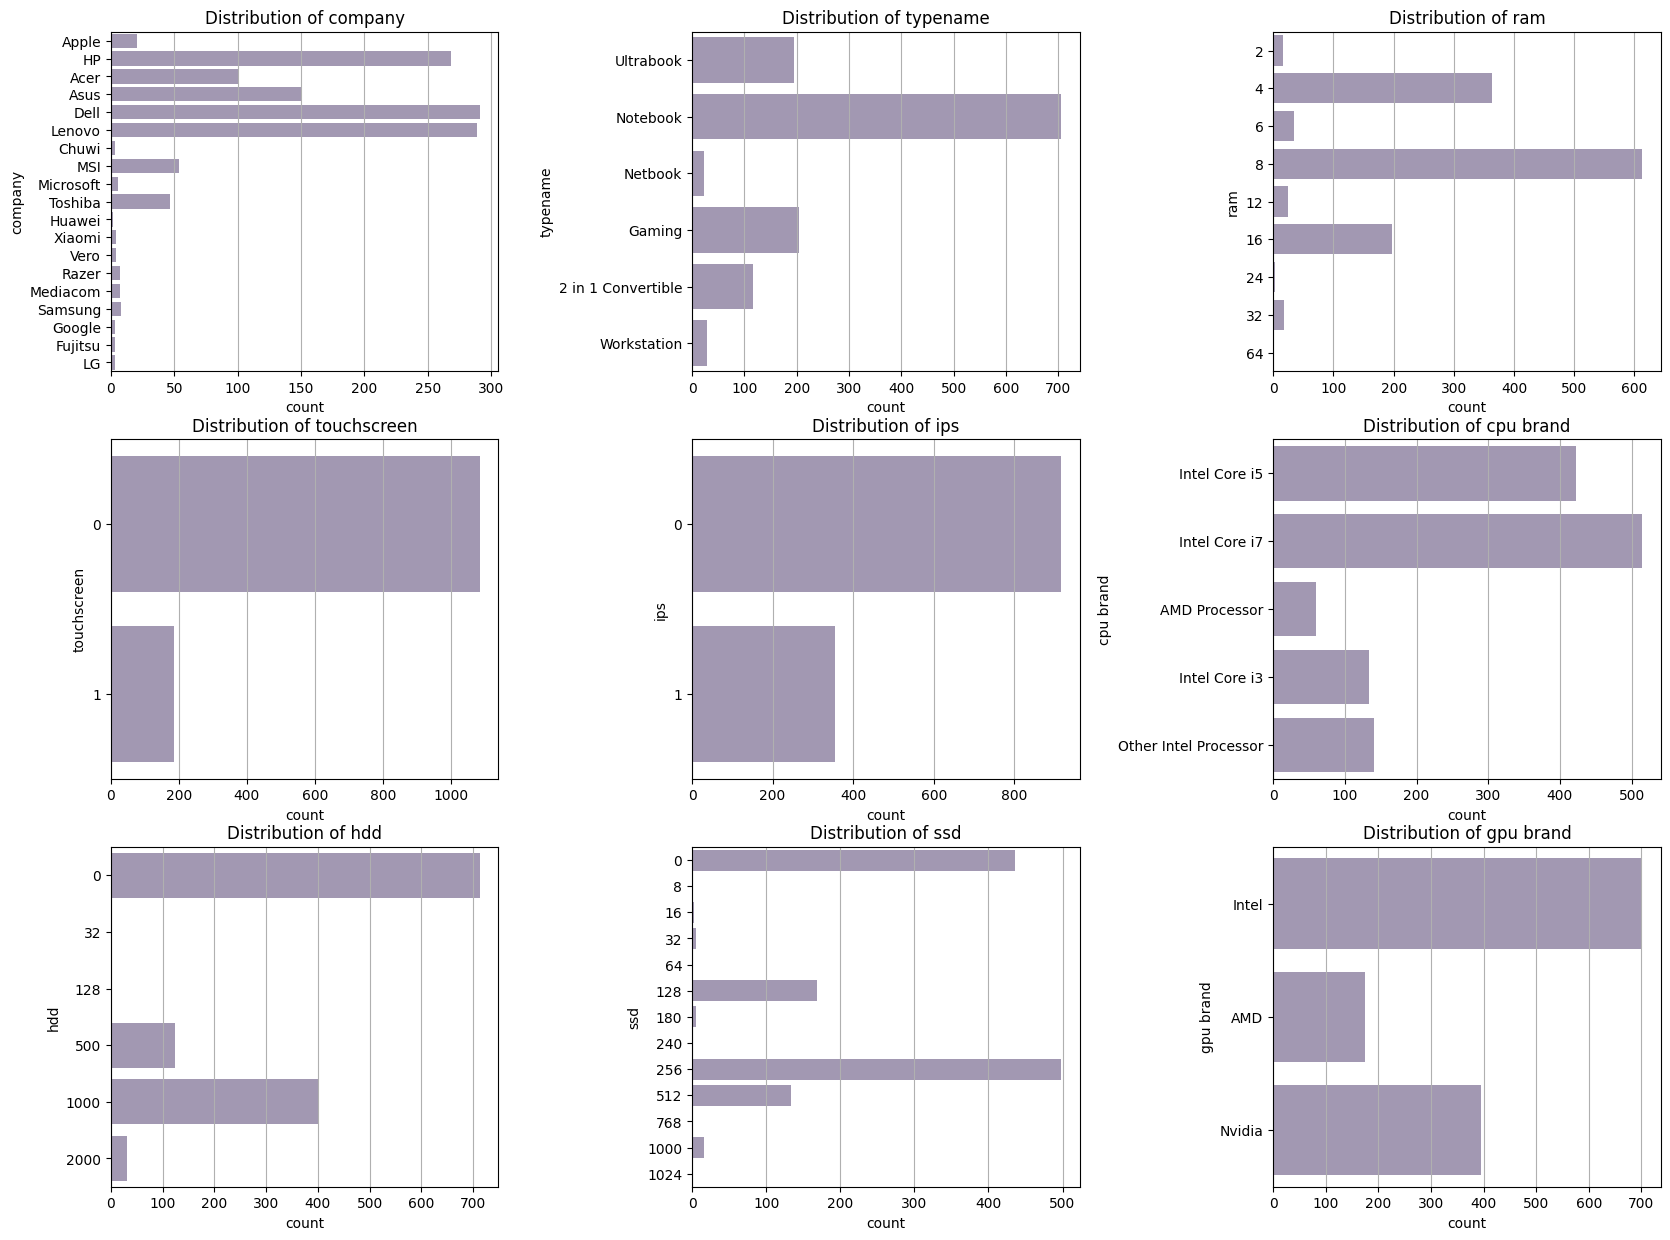

In [ ]:
x= 0
fig= plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace = 0.5)

for i in df_c.columns:
    ax = plt.subplot(331+x)
    ax = sns.countplot(data=df_c, y=i, color = '#A194B6')
    plt.grid(axis='x')
    ax.set_title(f'Distribution of {i}')
    x+=1


## **types of laptop and processor used**

<Axes: xlabel='typename', ylabel='count'>

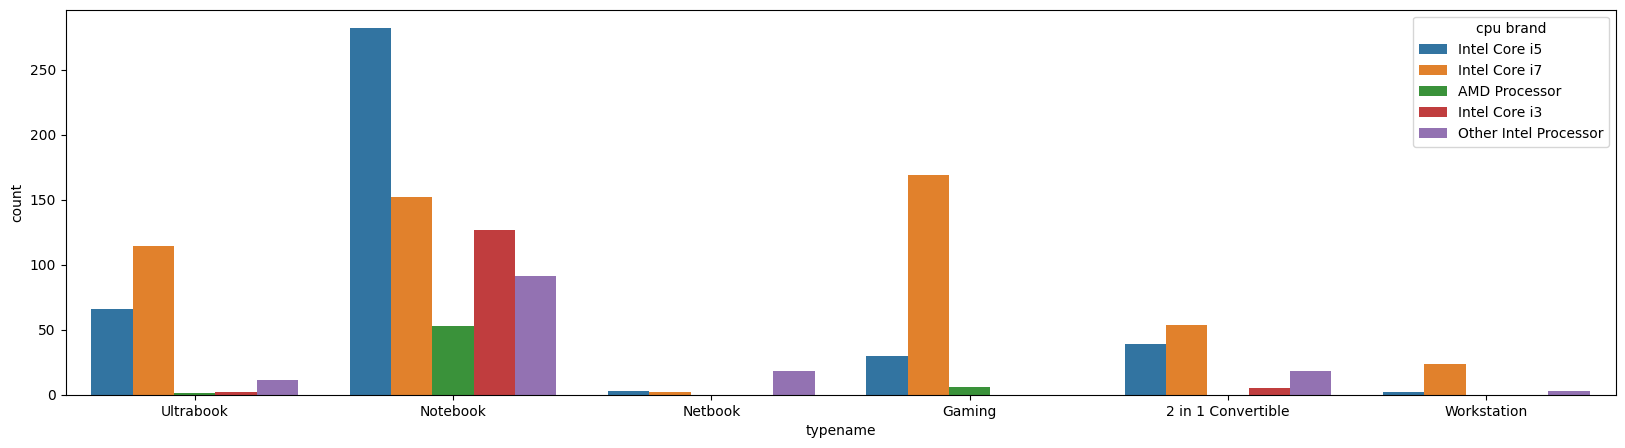

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data= df, x= 'typename', hue= 'cpu brand')

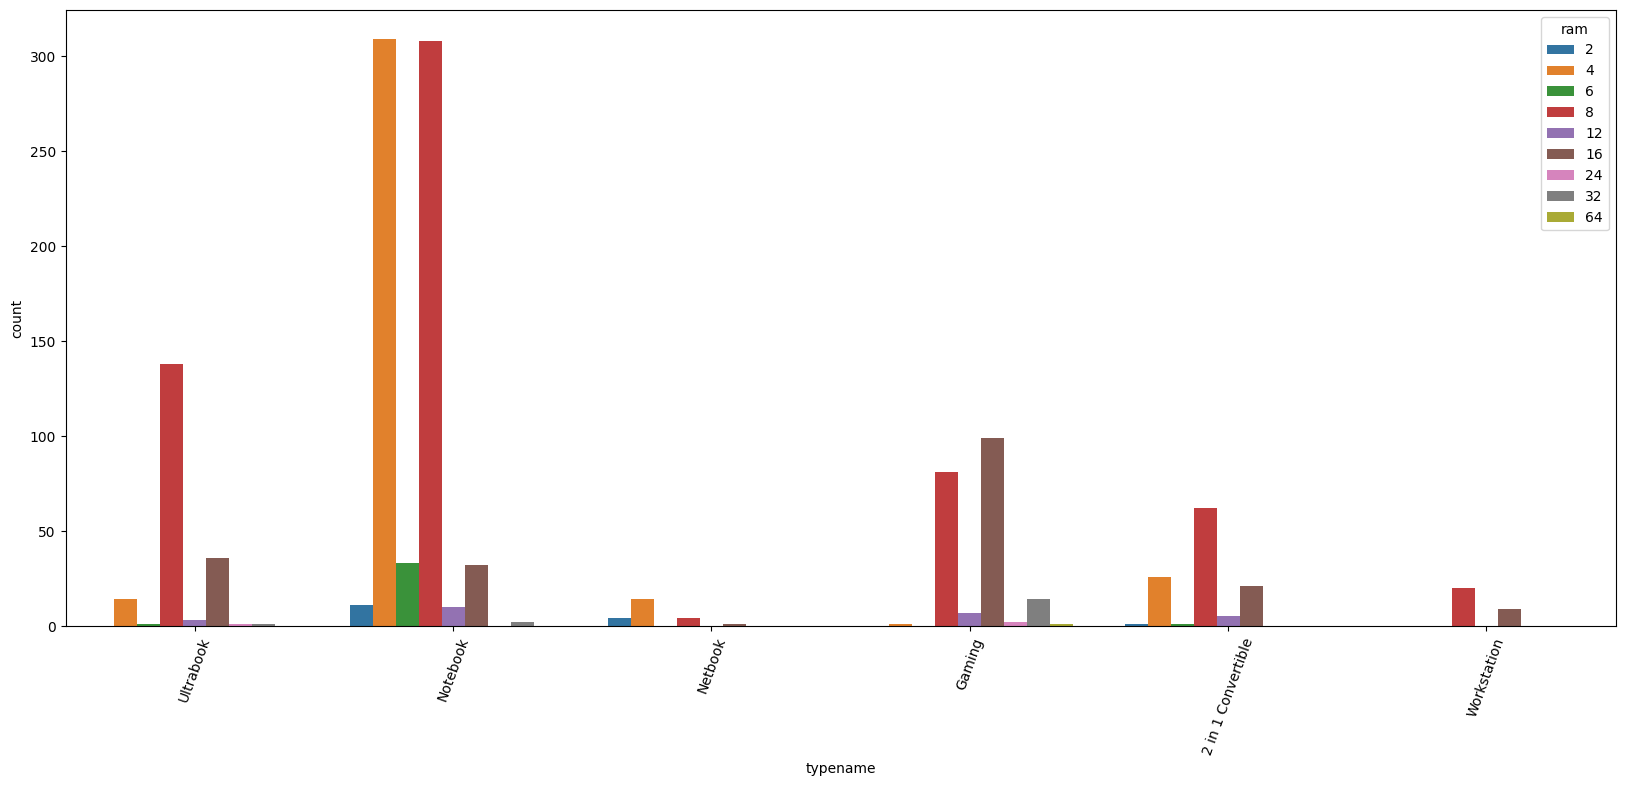

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data= df, x= 'typename', hue= 'ram')
plt.xticks(rotation= 70)
plt.show()

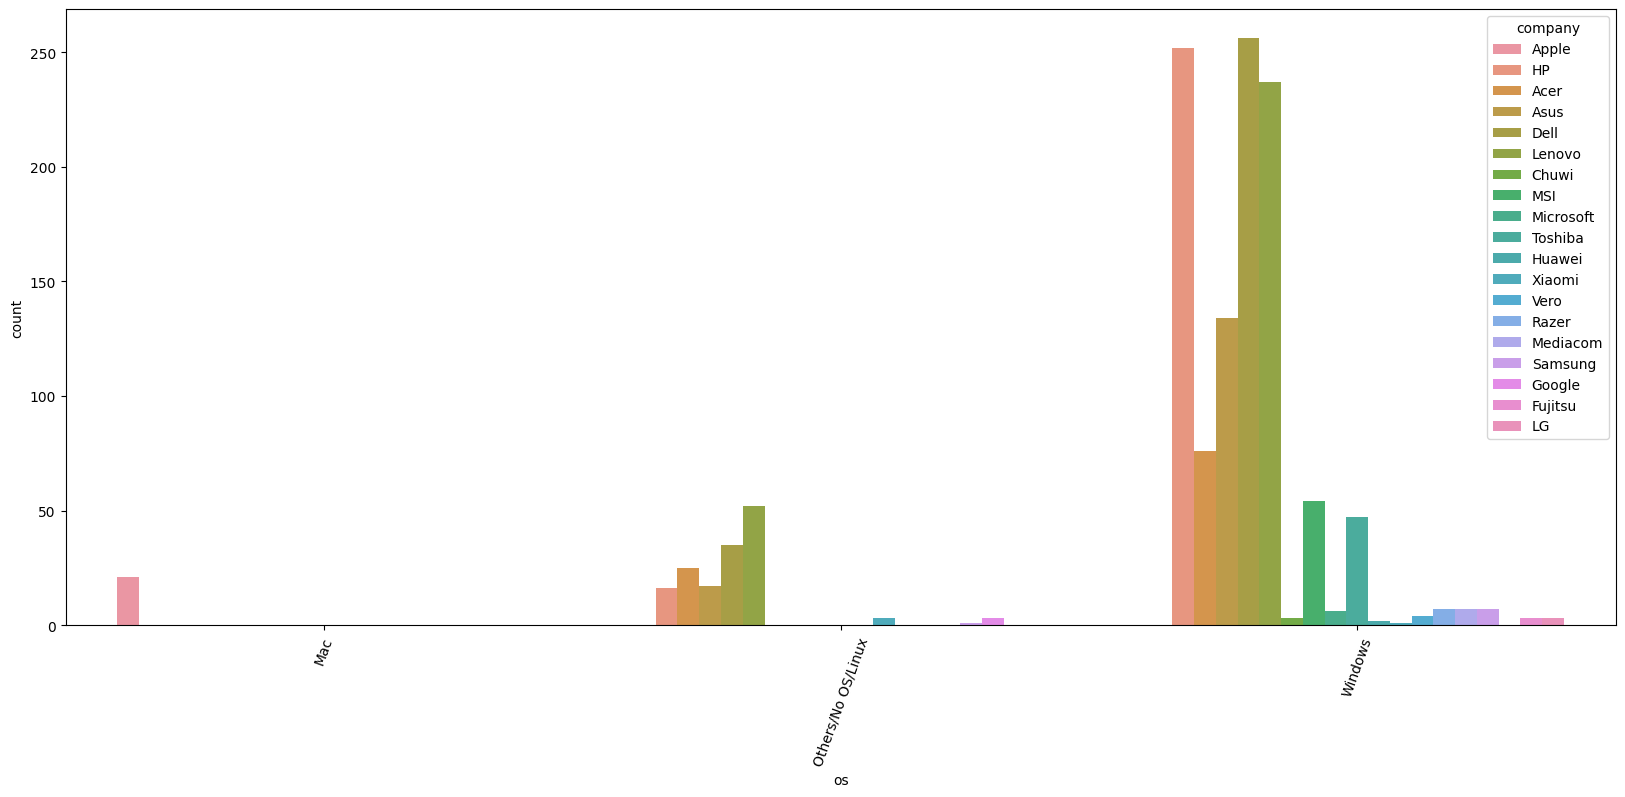

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data= df, x= 'os', hue= 'company')
plt.xticks(rotation= 70)
plt.show()

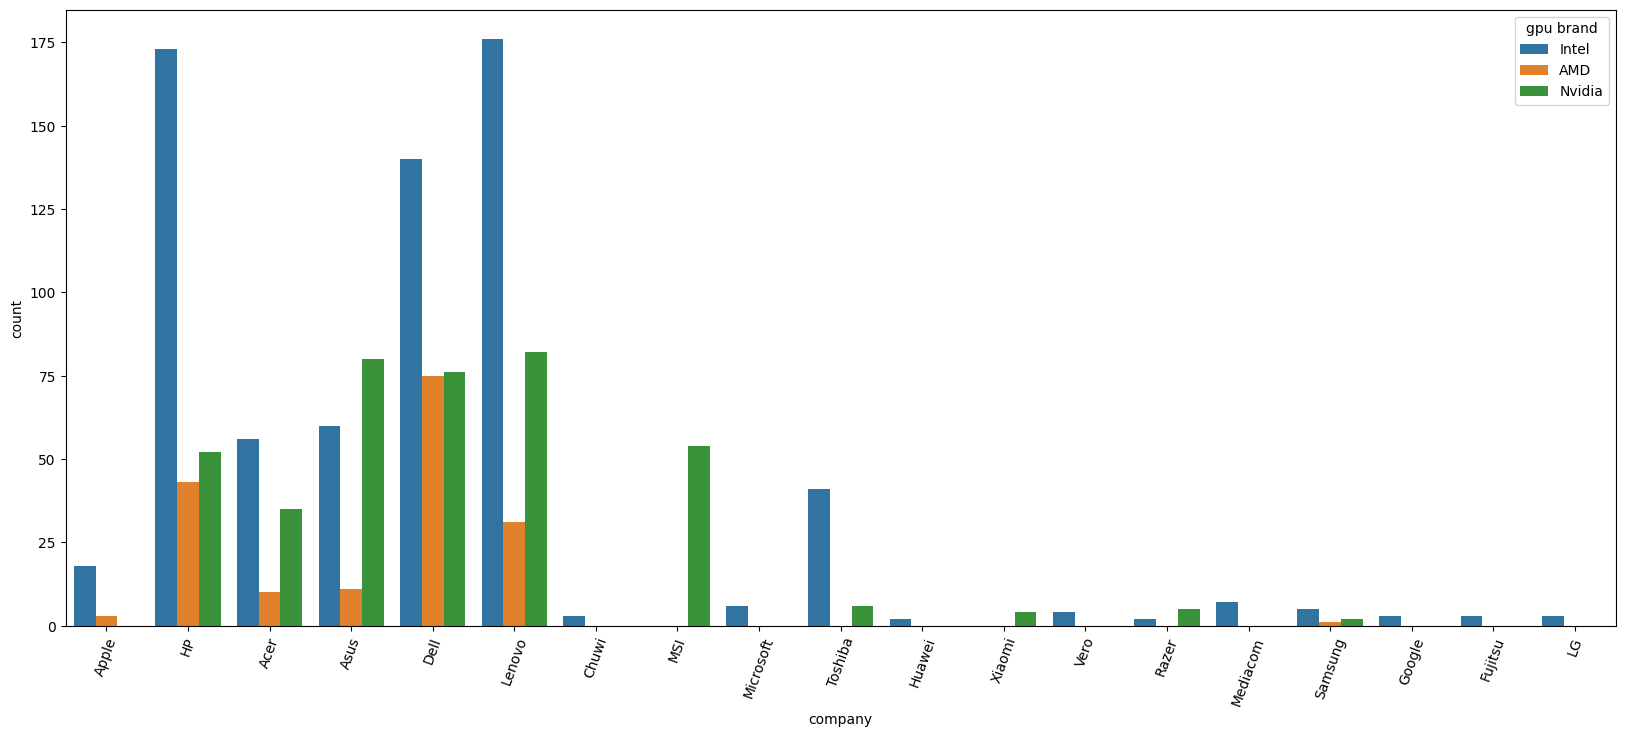

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data= df, x= 'company', hue= 'gpu brand')
plt.xticks(rotation= 70)
plt.show()

In [ ]:
df.head()

,company,typename,ram,weight,price,touchscreen,ips,cpu brand,hdd,ssd,gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


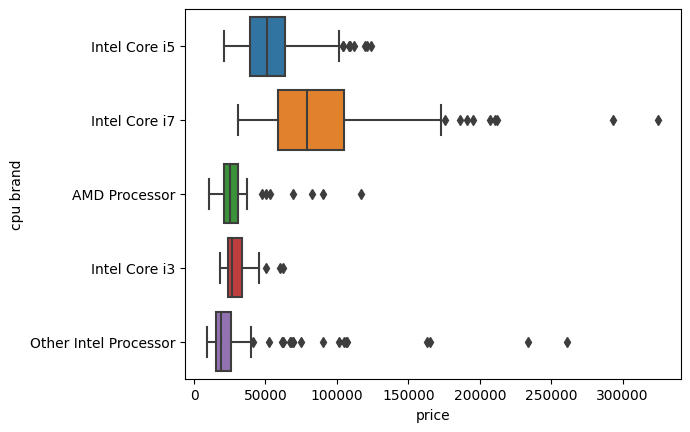

In [ ]:
sns.boxplot(y=df['cpu brand'],x=df['price'])
plt.show()

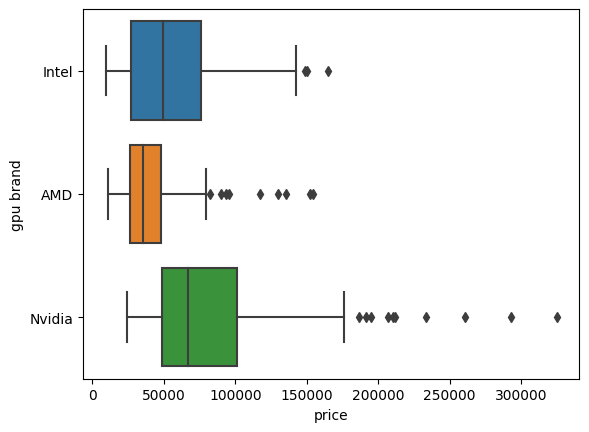

In [ ]:
sns.boxplot(y=df['gpu brand'],x=df['price'])
plt.show()

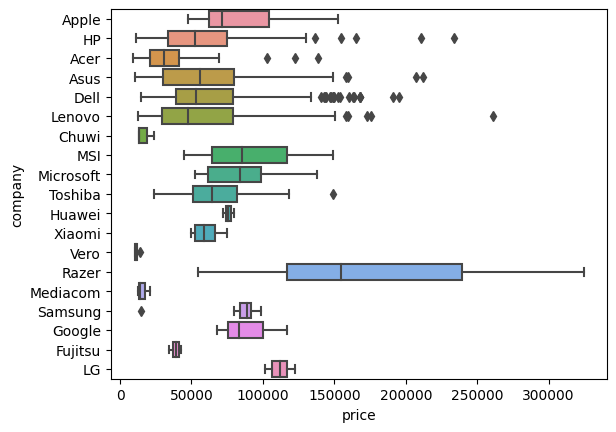

In [ ]:
sns.boxplot(y=df['company'],x=df['price'])
plt.show()

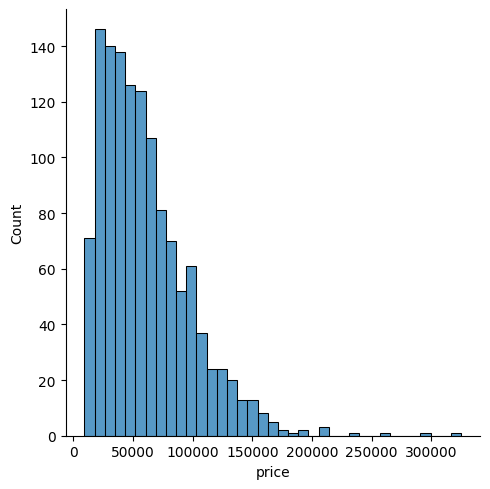

In [ ]:
sns.displot(df['price'])
plt.show()

<ipython-input-101-555c8497f108>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


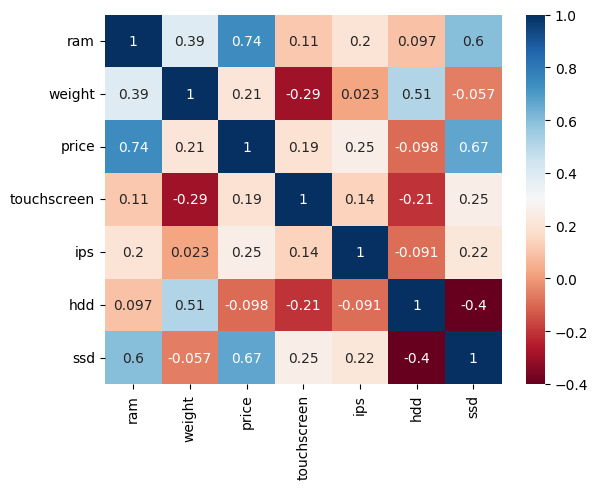

In [ ]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

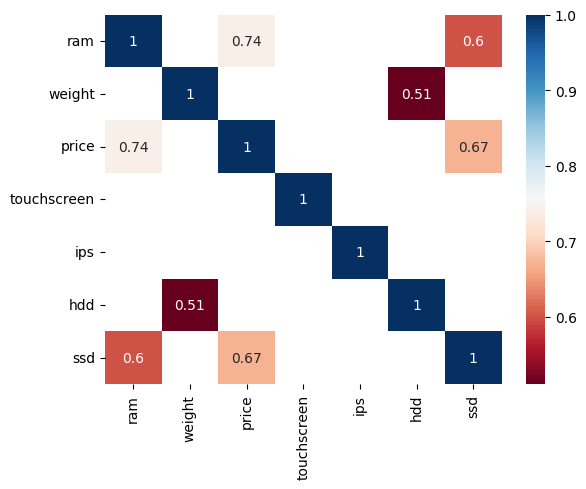

In [ ]:
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='RdBu')
plt.show()

In [ ]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
ram,1272.0,8.451258,5.099249,2.00,2.000000,4.00,4.00000,4.00000,8.00,16.0000,16.000000,32.000,64.00
weight,1272.0,2.041761,0.669088,0.69,0.955500,1.08,1.10000,1.17000,2.04,3.7800,4.300000,4.420,4.70
price,1272.0,60520.657755,37355.685811,9270.72,12960.514512,14119.20,15251.24016,17214.52824,52693.92,145283.3712,153350.208288,167855.976,324954.72
touchscreen,1272.0,0.147013,0.354258,0.00,0.000000,0.00,0.00000,0.00000,0.00,1.0000,1.000000,1.000,1.00
ips,1272.0,0.279874,0.449114,0.00,0.000000,0.00,0.00000,0.00000,0.00,1.0000,1.000000,1.000,1.00
hdd,1272.0,414.040881,518.128204,0.00,0.000000,0.00,0.00000,0.00000,0.00,1000.0000,2000.000000,2000.000,2000.00
ssd,1272.0,186.298742,186.597777,0.00,0.000000,0.00,0.00000,0.00000,256.00,512.0000,512.000000,1000.000,1024.00


In [ ]:
print(df[df['ram']>32].shape)

(1, 12)


In [ ]:
print(df[df['weight']>4.42].shape)

(6, 12)


In [ ]:
x = df.drop('price',axis=1)
y = df['price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1272, 11)
(1272,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(954, 11)
(318, 11)
(954,)
(318,)


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
x_train.dtypes

company         object
typename        object
ram              int64
weight         float64
touchscreen      int64
ips              int64
cpu brand       object
hdd              int64
ssd              int64
gpu brand       object
os              object
dtype: object

In [ ]:
step1= ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse= False),[0,1,6,9,10])],remainder='passthrough')

step2= LinearRegression()
pipe_lr= Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)
ypred_lr= pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)


MAE 13824.043397275735
MSE 405617725.17768687
RMSE 20139.9534552016
R2 Score 0.704909326906086


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Ridge(alpha=2.1)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13439.484454304682
MSE 376860254.86434776
RMSE 19412.88888507704
R2 Score 0.7258306544134675


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Lasso(alpha=2.1)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13780.624211455593
MSE 403508826.0812196
RMSE 20087.52911836644
R2 Score 0.706443570641591


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=15,min_samples_split=11,random_state=5)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MAE 10730.86288261474
MSE 267637219.46563208
RMSE 16359.621617434557
R2 Score 0.8052914299972965


In [ ]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 12611.125803225497
MSE 340739260.39065266
RMSE 18459.124041802545
R2 Score 0.7521090143332538


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe_rf,open('pipe_rf.pkl','wb'))
pickle.dump(df,open('data.pkl','wb'))

In [ ]:
from google.colab import files

# Download pipe_rf.pkl
files.download('pipe_rf.pkl')

# Download data.pkl
files.download('data.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>